In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import random
import pandas
import numpy as np
%matplotlib inline

The objective here is to simulate a particle of a particular material starting a depth in the ocean and sinking.  As it sinks it degenerates, releasing mass and dissolved elements into the water.  From time to time the particle may split into multiple particles depending on its particle type.  If mass>0 when it reaches the ocean floor at some depth, it will sit on the ocean floor and continue to degenerate as long as the surface of the particle is in contact with the ocean.  As other particles fall, they may cover this particle, decreasing the interaction between this particle surface and the ocean. 

In [ ]:
#abstract class ?
class radionuclide():
    def decay():
    def adsorb():
    def desorb():

In [2]:
class ocean():
    
    def __init__(self, depth, width):
        self.depth = depth
        self.width = width

In [52]:
class particle(ocean):
    
    def __init__(self, size, material, depth, x, age):
        self.size = size
        self.material = material
        self.age = None
        self.depth = depth
        self.x = x
        self.material = material
        self.alpha = 1

    def sink_decay(self, ocean):
        if self.size >0:
            if self.depth == ocean.depth:
                self.depth += 2
                self.size = self.size-2
            elif (ocean.depth >self.depth >= ocean.depth-20):
                self.depth = ocean.depth
            elif self.depth>ocean.depth:
                self.depth += 2
            else:
                self.size = self.size-2
                self.depth += 20
            self.alpha = self.alpha-.1
        else:
            self.size = 0
        
            

In [56]:
Pacific = ocean(300,100)

In [57]:
def make_particles(n):
    particles = []

    x = np.random.choice(Pacific.depth,n)
#     y = np.random.choice(Pacific.depth,n)
    y = np.random.lognormal(3, 1, n)+50
    sizes = np.random.choice(100,n)

    for ik in range(n):
        particles.append(particle(sizes[ik], 'calcite', y[ik], x[ik], 0))
    return particles

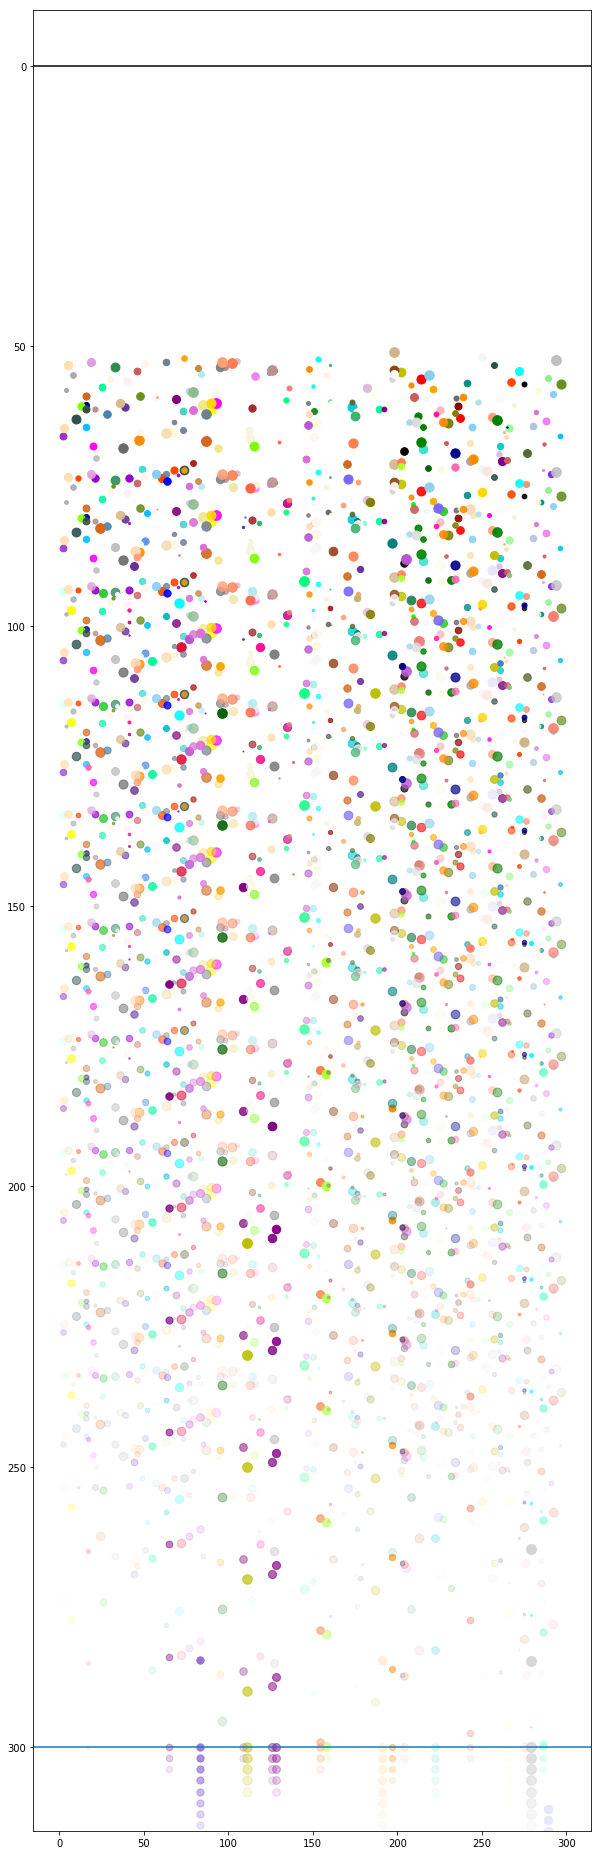

In [59]:
particles = make_particles(300)
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
# if n % len(sorted_names) >0:
#     sorted_names = sorted_names * int(np.floor(n/len(sorted_names))+1)


fig = plt.figure(figsize = (Pacific.width/10,(Pacific.depth+35)/10))
ax1 = plt.subplot() 
# plt.axhline(linewidth=8, color='#d62728')
plt.axhline(y=Pacific.depth)
plt.axhline(y=0, color = 'black')
ax1.set_ylim([-10, Pacific.depth+15])
plt.gca().invert_yaxis()


for ik, part in enumerate(particles):
    color_name = colors[random.choice(sorted_names)]
    steps = max(part.size,1)
    for ik in range(11):
        plt.scatter(part.x, part.depth, alpha = part.alpha, s = part.size, color=color_name)
        part.sink_decay(Pacific)
        if part.size < 0:
            part.size = 0

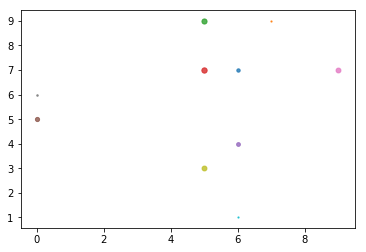

In [75]:
for part in particles:
    part.sink()
    part.decay()
    plt.scatter(part.x, part.depth, alpha = part.alpha, s = part.size)



In [70]:
plt.show()